In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [25]:
df_train = pd.read_csv("Data/train.csv", low_memory=False, index_col="ID")
df_test = pd.read_csv("Data/test.csv", low_memory=False)

In [26]:
df_train.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

In [28]:
df_train[["Monthly_Inhand_Salary", "Num_of_Delayed_Payment", "Type_of_Loan",  "Name", "Num_Credit_Inquiries", "Credit_History_Age", "Amount_invested_monthly"]].isnull().sum()

Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Type_of_Loan               11408
Name                        9985
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
dtype: int64

In [29]:
df_train["Customer_ID"].value_counts()[1]

C:\Users\NMhkwanazi\AppData\Local\Temp\ipykernel_27140\4060209663.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_train["Customer_ID"].value_counts()[1]


np.int64(8)

In [30]:
df_train["Name"].value_counts()

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64

In [31]:
df_train["SSN"].value_counts()

SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

In [32]:
df_train["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [33]:
# change to the right data type

In [34]:
df_train["Annual_Income"] = df_train["Annual_Income"].str.replace(r"_$", "", regex=True).astype(float)

In [35]:
df_train["Num_of_Loan"] = df_train["Num_of_Loan"].str.replace(r"_$", "", regex=True).astype(int)

In [36]:
df_train["Num_of_Delayed_Payment"] = df_train["Num_of_Delayed_Payment"].str.replace(r"_$", "", regex=True).astype(float)

In [37]:
df_train["Changed_Credit_Limit"].value_counts()

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64

In [38]:
df_train["Changed_Credit_Limit"] = df_train["Changed_Credit_Limit"].replace("_", np.nan).astype(float)

In [39]:
df_train["Outstanding_Debt"] = df_train["Outstanding_Debt"].str.replace(r"_$", "", regex=True).astype(float)

In [40]:
df_train["Monthly_Balance"] = df_train["Monthly_Balance"].str.replace(r"[^0-9.-]", "", regex=True).astype(float)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  int64  
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

<Axes: xlabel='count', ylabel='Occupation'>

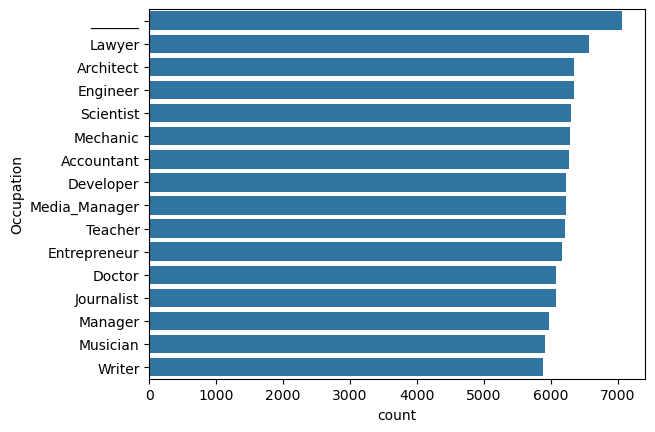

In [42]:
sns.barplot(df_train["Occupation"].value_counts(), orient="h")

In [43]:
df_train["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [44]:
df_train["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [45]:
df_train["Occupation"] = df_train["Occupation"].replace("_______", "unknown")

<Axes: ylabel='Annual_Income'>

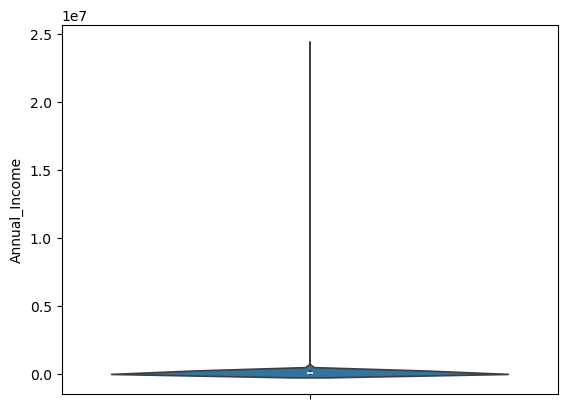

In [46]:
sns.violinplot(df_train["Annual_Income"])

<Axes: ylabel='Annual_Income'>

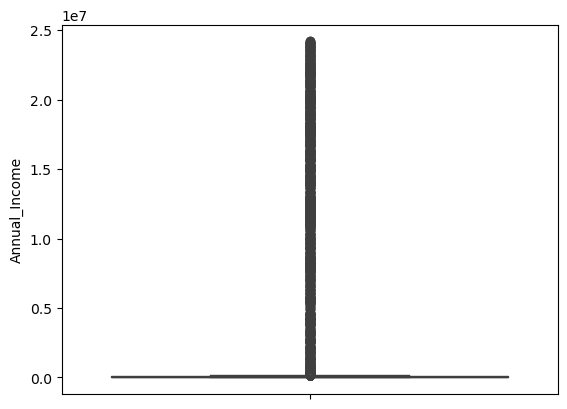

In [47]:
sns.boxplot(df_train["Annual_Income"])

In [48]:
df_train["Annual_Income"].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [49]:
df_train["Annual_Income"].skew()

np.float64(12.51217317277124)

In [50]:
df_train["Monthly_Inhand_Salary"] = df_train["Monthly_Inhand_Salary"].fillna(df_train["Monthly_Inhand_Salary"].median())

<Axes: ylabel='Monthly_Inhand_Salary'>

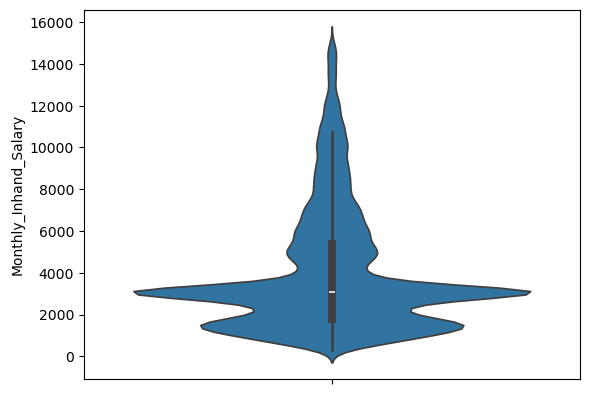

In [51]:
sns.violinplot(df_train["Monthly_Inhand_Salary"])

<Axes: ylabel='Monthly_Inhand_Salary'>

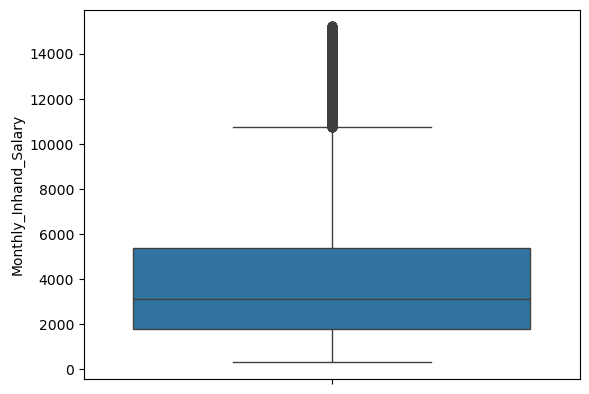

In [52]:
sns.boxplot(df_train["Monthly_Inhand_Salary"])

<Axes: xlabel='Annual_Income', ylabel='Occupation'>

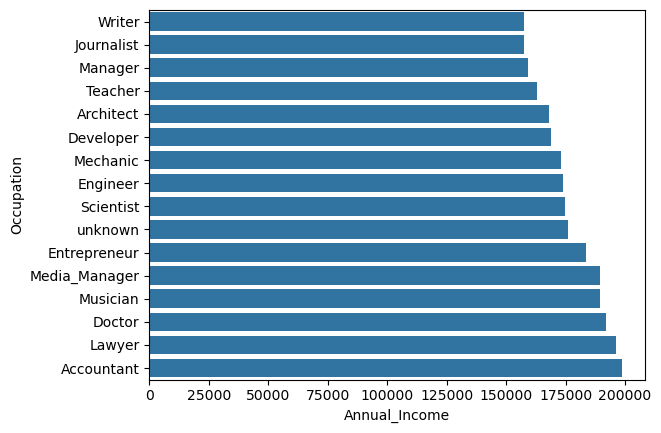

In [53]:
sns.barplot(df_train.groupby(["Occupation"])["Annual_Income"].mean().sort_values(), orient='h')

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  int64  
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

In [55]:
df_train.drop(columns="Name", inplace=True)

In [56]:
df_train["Type_of_Loan"] = df_train["Type_of_Loan"].fillna(df_train["Type_of_Loan"].mode()[0])

In [57]:
df_train["Num_of_Delayed_Payment"] = df_train["Num_of_Delayed_Payment"].fillna(df_train["Num_of_Delayed_Payment"].median())
df_train["Changed_Credit_Limit"] = df_train["Changed_Credit_Limit"].fillna(df_train["Changed_Credit_Limit"].median())
df_train["Num_Credit_Inquiries"] = df_train["Num_Credit_Inquiries"].fillna(df_train["Num_Credit_Inquiries"].median())
df_train["Monthly_Balance"] = df_train["Monthly_Balance"].fillna(df_train["Monthly_Balance"].median())

In [58]:
(df_train.nunique()/100000)*100

Customer_ID                  12.500
Month                         0.008
Age                           1.788
SSN                          12.501
Occupation                    0.016
Annual_Income                13.487
Monthly_Inhand_Salary        13.235
Num_Bank_Accounts             0.943
Num_Credit_Card               1.179
Interest_Rate                 1.750
Num_of_Loan                   0.414
Type_of_Loan                  6.260
Delay_from_due_date           0.073
Num_of_Delayed_Payment        0.711
Changed_Credit_Limit          4.383
Num_Credit_Inquiries          1.223
Credit_Mix                    0.004
Outstanding_Debt             12.203
Credit_Utilization_Ratio    100.000
Credit_History_Age            0.404
Payment_of_Min_Amount         0.003
Total_EMI_per_month          14.950
Amount_invested_monthly      91.049
Payment_Behaviour             0.007
Monthly_Balance              98.793
Credit_Score                  0.003
dtype: float64

In [59]:
df_train["Amount_invested_monthly"] = df_train["Amount_invested_monthly"].str.replace(r"[^0-9.-]", "", regex=True).astype(float)

In [60]:
df_train["Amount_invested_monthly"] = df_train["Amount_invested_monthly"].fillna(df_train["Amount_invested_monthly"].median())

In [61]:
df_train["Credit_History_Age"] = df_train["Credit_History_Age"].fillna(df_train["Credit_History_Age"].mode()[0])

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   SSN                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int64  
 11  Type_of_Loan              100000 non-null  object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  

In [63]:
df_train.select_dtypes(include=['number']).corr()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Annual_Income,1.000000,0.028034,-0.004627,0.001250,-0.002908,0.001464,-0.010631,0.001086,0.000557,0.003152,-0.003706,0.010316,-0.000248,-0.005068,0.000818
Monthly_Inhand_Salary,0.028034,1.000000,-0.010318,-0.004857,-0.005573,-0.008748,-0.227726,0.001038,-0.157540,-0.007925,-0.246268,0.158433,0.006692,0.054833,-0.000762
Num_Bank_Accounts,-0.004627,-0.010318,1.000000,-0.002216,-0.003998,-0.000679,0.015966,-0.003505,0.007888,-0.001694,0.015548,-0.001365,-0.001433,0.003088,0.001058
Num_Credit_Card,0.001250,-0.004857,-0.002216,1.000000,-0.004012,0.001421,0.008715,0.004703,0.005594,-0.003507,0.005626,-0.003341,0.000768,-0.002133,0.001268
Interest_Rate,-0.002908,-0.005573,-0.003998,-0.004012,1.000000,0.000614,0.009792,0.002698,0.000816,-0.001667,0.010721,-0.000359,0.002517,-0.001082,0.001248
Num_of_Loan,0.001464,-0.008748,-0.000679,0.001421,0.000614,1.000000,0.012625,0.009972,0.015581,-0.000516,0.023772,-0.003967,0.001554,-0.001093,-0.000032
Delay_from_due_date,-0.010631,-0.227726,0.015966,0.008715,0.009792,0.012625,1.000000,0.012181,0.290698,0.011411,0.571713,-0.063796,-0.003889,-0.012228,0.004442
Num_of_Delayed_Payment,0.001086,0.001038,-0.003505,0.004703,0.002698,0.009972,0.012181,1.000000,0.006809,0.002583,0.009711,0.000985,0.001116,0.001333,0.000873
Changed_Credit_Limit,0.000557,-0.157540,0.007888,0.005594,0.000816,0.015581,0.290698,0.006809,1.000000,0.006431,0.453835,-0.048416,-0.001756,-0.011201,-0.002181
Num_Credit_Inquiries,0.003152,-0.007925,-0.001694,-0.003507,-0.001667,-0.000516,0.011411,0.002583,0.006431,1.000000,0.013281,0.000169,-0.006968,-0.000763,0.001025


<Axes: >

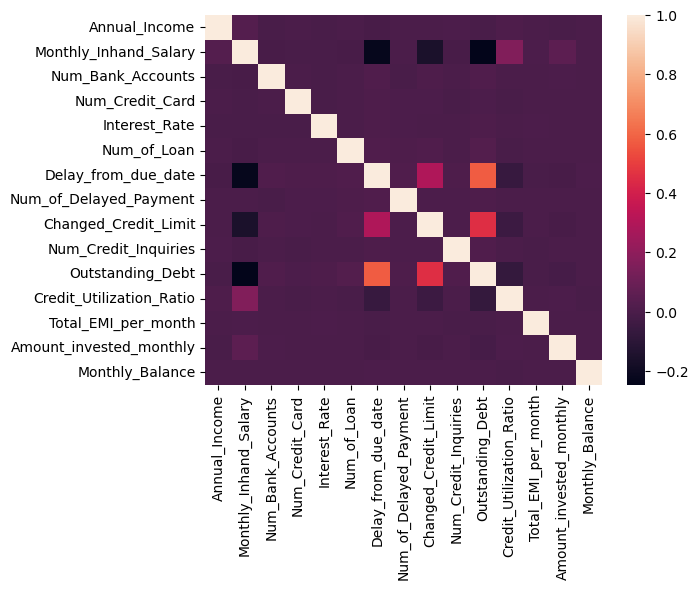

In [64]:
sns.heatmap(df_train.select_dtypes(include=['number']).corr())

In [73]:
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].replace("!@9#%8", "unknown")

In [66]:
df_train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
unknown                              7600
Name: count, dtype: int64

In [67]:
df_train["Credit_Mix"] = df_train["Credit_Mix"].replace("", "unknown")

In [68]:
df_train["Changed_Credit_Limit"]

ID
0x1602     11.27
0x1603     11.27
0x1604      9.40
0x1605      6.27
0x1606     11.27
           ...  
0x25fe9    11.50
0x25fea    11.50
0x25feb    11.50
0x25fec    11.50
0x25fed    11.50
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

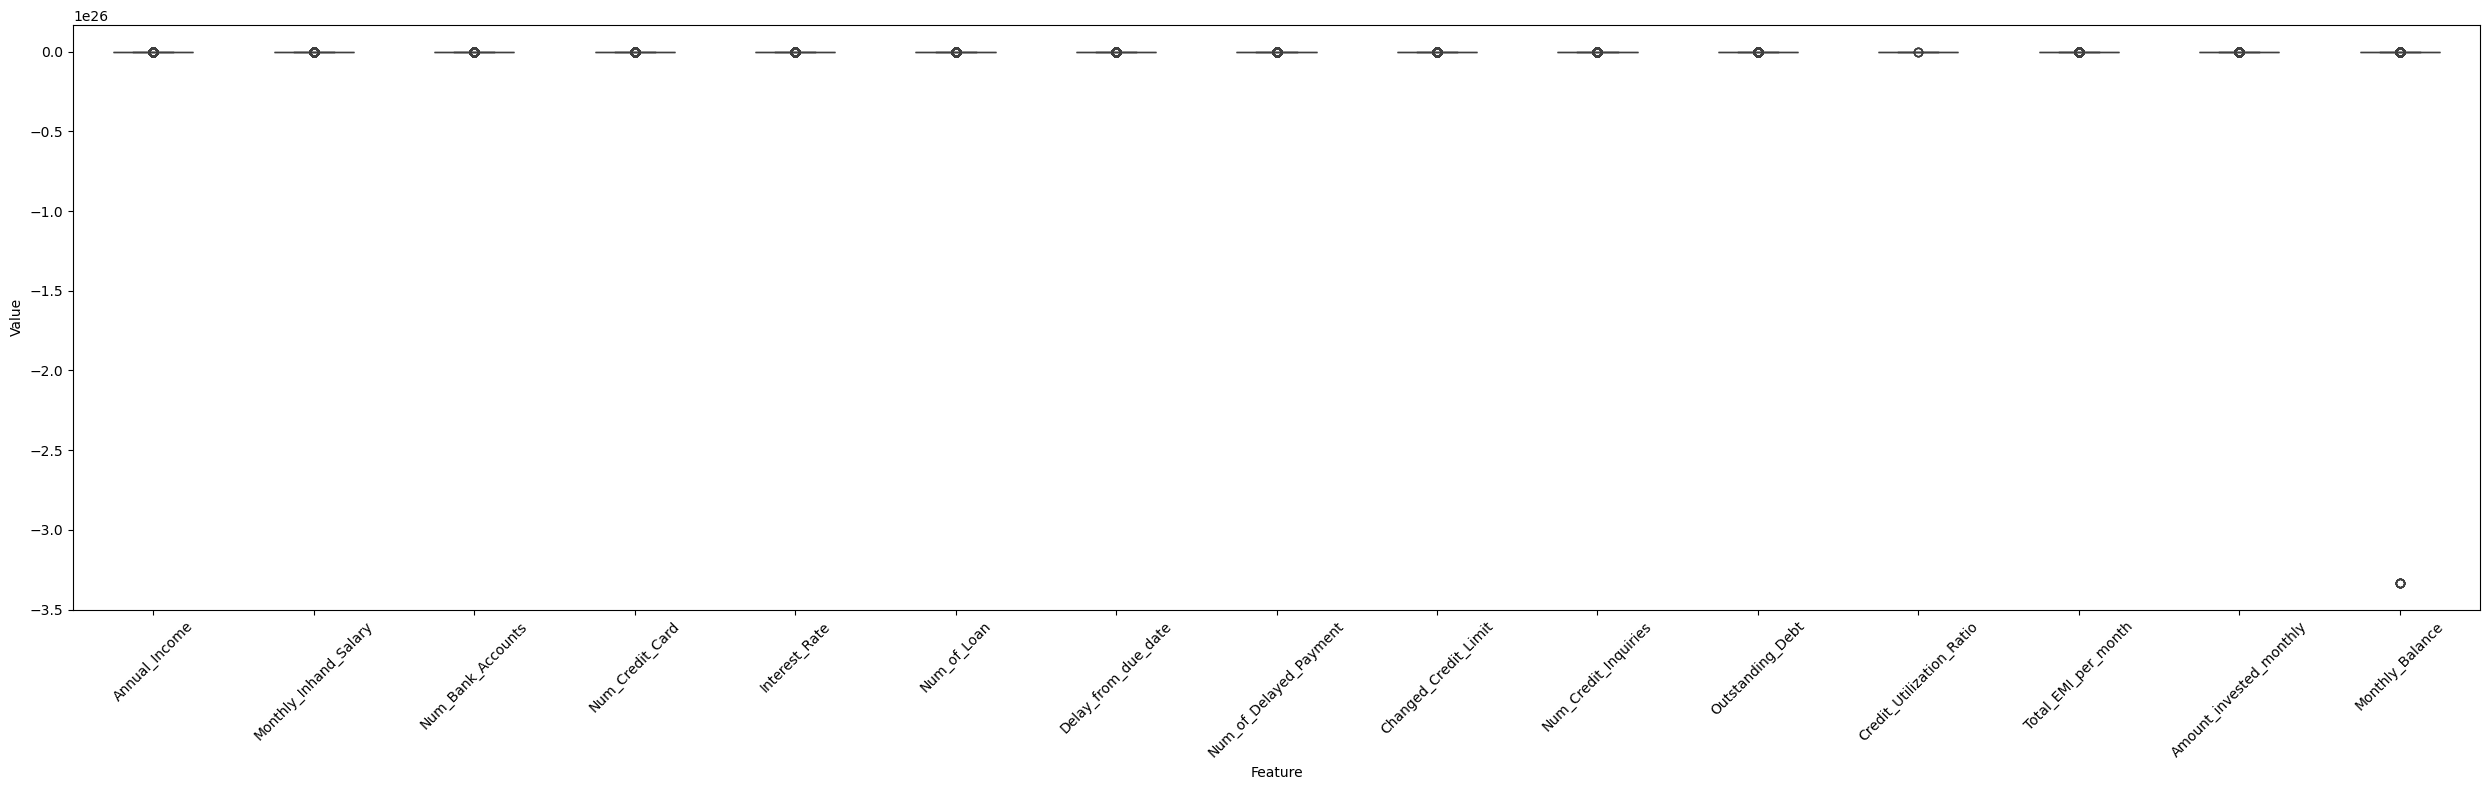

In [72]:
num_cols = df_train.select_dtypes(include=['number'])
melted_df = num_cols.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(25, 8))
sns.boxplot(data=melted_df, x='Feature', y='Value', width=0.5)  

plt.xticks(rotation=45)
plt.tight_layout()

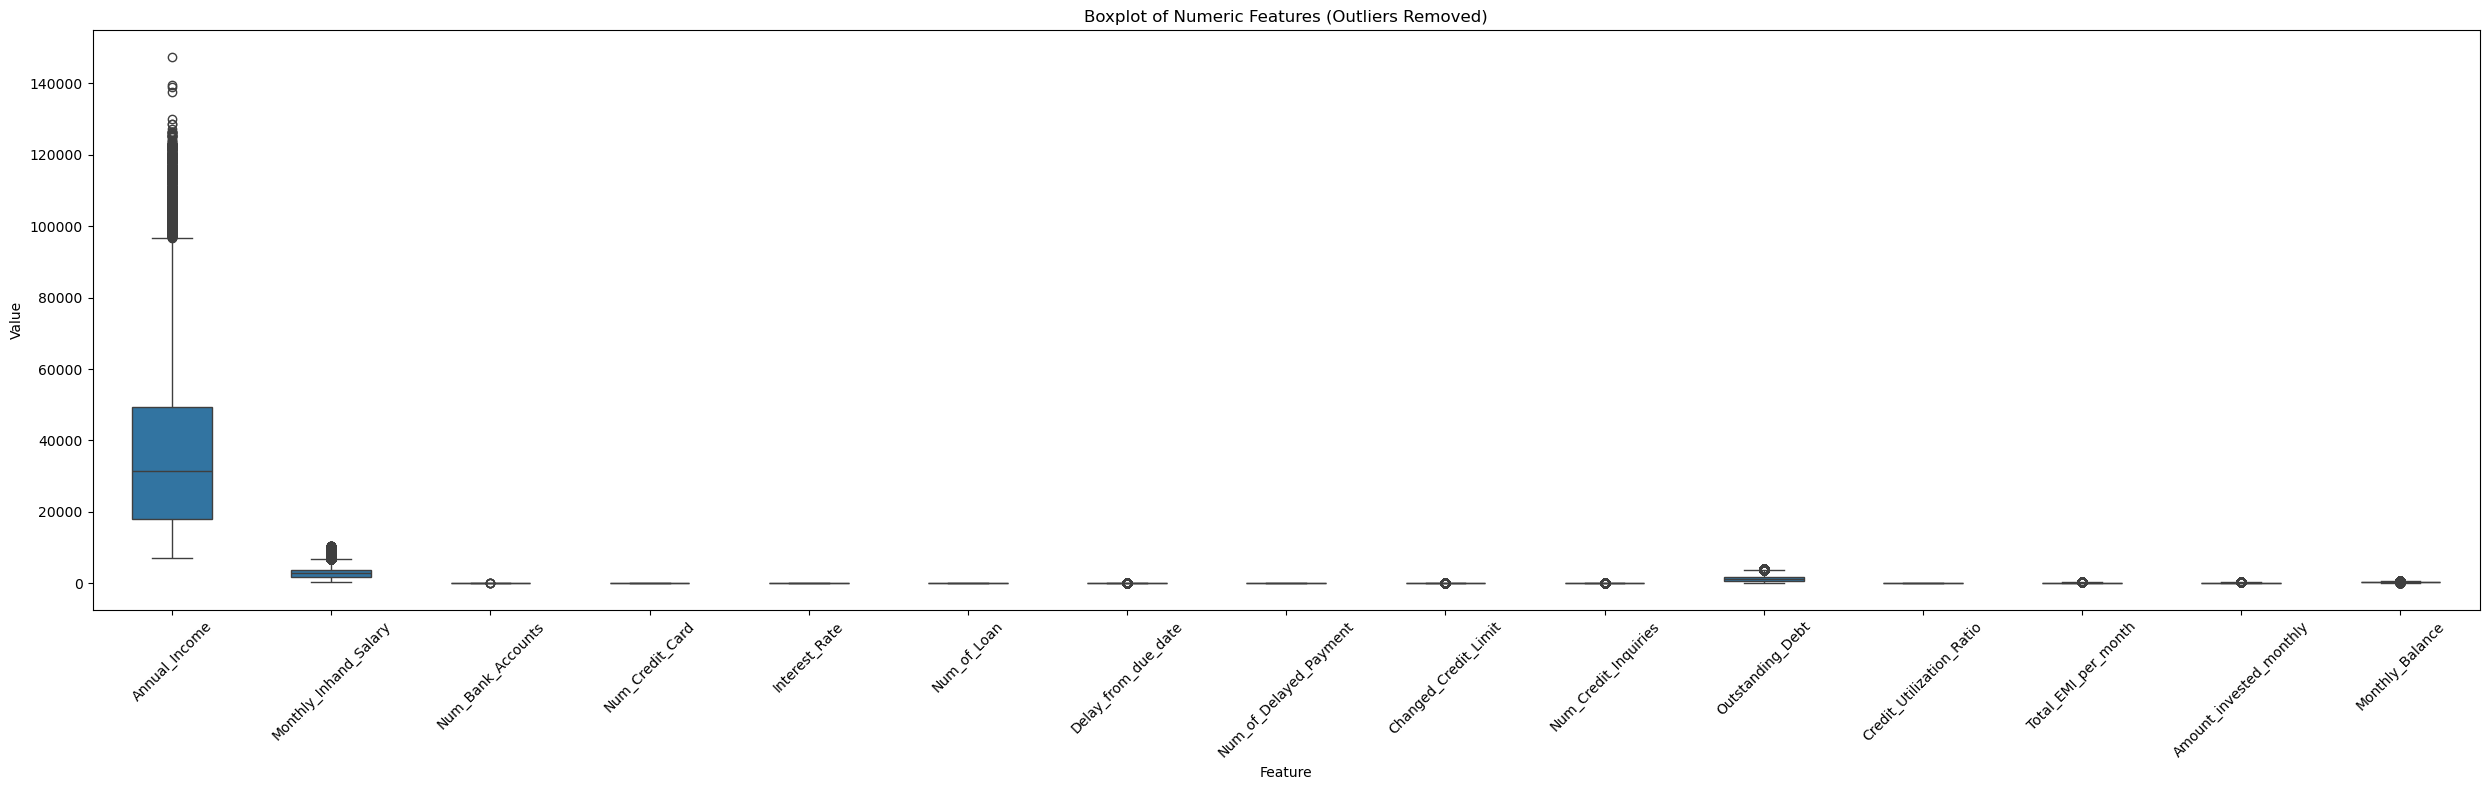

In [70]:
numeric_df = df_train.select_dtypes(include=['number'])

def remove_outliers_iqr(df):
    cleaned_df = df.copy()
    for col in cleaned_df.columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
       
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
    return cleaned_df

# Remove outliers
numeric_df_no_outliers = remove_outliers_iqr(numeric_df)

# Melt for seaborn
melted_df = numeric_df_no_outliers.melt(var_name='Feature', value_name='Value')

# Plot boxplots without outliers
plt.figure(figsize=(25, 8))
sns.boxplot(data=melted_df, x='Feature', y='Value', width=0.5)
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features (Outliers Removed)')
plt.tight_layout()

In [71]:
numeric_df.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,1.764157e+05,4029.084964,17.091280,22.47443,72.466040,3.009960,21.068780,29.738370,10.368345,27.326780,1426.220376,32.285173,1403.118217,614.951381,-3.000000e+22
std,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,62.647879,14.860104,218.017612,6.719627,191.293766,1155.129026,5.116875,8306.041270,1999.726647,3.162151e+24
min,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.420000,3.000000,566.072500,28.052567,30.306660,77.017414,2.708934e+02
50%,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,255.038698,4.676706e+02
max,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [74]:
X = df_train.drop(columns="Credit_Score")
y = df_train["Credit_Score"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [76]:
cols = X.select_dtypes(include=['object']).columns.values

In [77]:
preprocess = ColumnTransformer(
    transformers = [
        ("category", OneHotEncoder(handle_unknown='ignore'), cols)
    ],
    remainder='passthrough'
)

In [140]:
pipeline_RF = Pipeline([("preprocess", preprocess), ("rf", RandomForestClassifier())])

In [142]:
pipeline_RF_smote = pipe_imb([("preprocess", preprocess), ("smote", SMOTE(random_state=42)), ("rf", RandomForestClassifier())])

In [141]:
pipeline_RF.fit(X_train, y_train)

C:\Users\NMhkwanazi\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  array(['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Payment_Behaviour'], dtype=object))])),
                ('rf', RandomForestClassifier())])

In [143]:
pipeline_RF_smote.fit(X_train, y_train)

C:\Users\NMhkwanazi\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  array(['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Payment_Behaviour'], dtype=object))])),
                ('smote', SMOTE(random_state=42)),
                ('rf', RandomForestClassifier())])

In [145]:
y_pred = pipeline_RF.predict(X_test)

In [146]:
y_pred_smote = pipeline_RF_smote.predict(X_test)

In [147]:
pipeline_RF.score(X_test, y_test)

0.77565

In [96]:

print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [150]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

        Good       0.66      0.62      0.64      3527
        Poor       0.71      0.75      0.73      5874
    Standard       0.75      0.75      0.75     10599

    accuracy                           0.73     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.73      0.73      0.73     20000



In [92]:
xgboost_class = XGBClassifier()

preprocess = ColumnTransformer(
    transformers = [
        ("category", OneHotEncoder(handle_unknown='ignore'), cols)
    ],
    remainder='passthrough'
)

pipeline_xgb_class = Pipeline([("preprocess", preprocess), ("xgb", xgboost_class)])

enc = OrdinalEncoder(categories=[['Poor', 'Standard', 'Good']])
y_train_ordered = enc.fit_transform(y_train.values.reshape(-1, 1)).ravel()

pipeline_xgb_class.fit(X_train, y_train_ordered)

,steps,"[('preprocess', ...), ('xgb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('category', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [94]:
y_test_ordered = enc.fit_transform(y_test.values.reshape(-1, 1)).ravel()
y_pred_ordered = pipeline_xgb_class.predict(X_test)

In [98]:
print(classification_report(y_test_ordered, y_pred_ordered))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.69      5874
         1.0       0.74      0.77      0.76     10599
         2.0       0.61      0.68      0.64      3527

    accuracy                           0.72     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000



In [107]:
from sklearn.utils.class_weight import compute_sample_weight

xgb_model = XGBClassifier()

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

pipeline_xgb_class = Pipeline([("preprocess", preprocess), ("xgb", xgb_model)])
pipeline_xgb_class.fit(X_train, y_train_ordered, xgb__sample_weight=sample_weights)

,steps,"[('preprocess', ...), ('xgb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('category', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [108]:
y_pred_ordered_xgb = pipeline_xgb_class.predict(X_test)

In [109]:
print(classification_report(y_test_ordered, y_pred_ordered_xgb))

              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72      5874
         1.0       0.85      0.58      0.69     10599
         2.0       0.51      0.85      0.64      3527

    accuracy                           0.69     20000
   macro avg       0.68      0.74      0.68     20000
weighted avg       0.74      0.69      0.69     20000

